In [123]:
import pandas as pd                           # бібліотека для опрацьовування датафреймів
import numpy as np                            # бібліотека для опрацьовування масивів

name = "DS6.txt"
DataFrame = pd.read_csv(name,                 # назва датафрейму
                        sep = " ",            # роздільник
                        header = None,        # читаємо фрейм без заголовку
                        names = ["X", "Y"])   # назви першого і другого стовпця будуть відповідно "Х" і "У"

DataFrame_new = pd.DataFrame()                # міняємо місцями стовбці
DataFrame_new["X"] = DataFrame["Y"]           # бо графік будується з нижньої точки
DataFrame_new["Y"] = DataFrame["X"]

points = np.array(DataFrame_new)              # створюємо масив
from scipy.spatial import ConvexHull          # метод для створення опуклої оболонки
hull = ConvexHull(points)                     # робимо опуклу оболонку з масиву

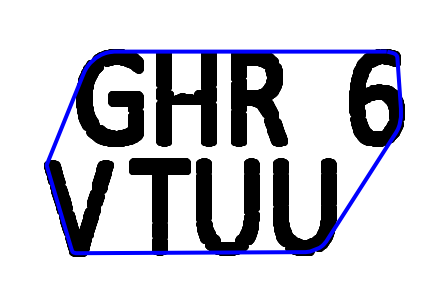

In [129]:
MainFigure = plt.figure()                    # створюємо об'єкт типу figure
MainAxes = MainFigure.add_axes((0, 0, 1, 1)) # створємо об'єкт типу axes на передньо створеному MainFigure, причому графік буде займати всю площу об'єкта figure
plt.axis('off')                              # виключаємо осі
MainAxes.scatter(DataFrame_new["X"],         # заносимо на MainAxes точки з координатами х і у
                 DataFrame_new["Y"],
                 color = 'black')            # колір точок буде чорним
plt.xlim([0, 960])                           # розмір вікна 540*960 пкс
plt.ylim([0, 540])

MainAxes.plot(points[hull.vertices,0],       # заносимо на MainAxes опуклу оболонку, синього кольру, товщини 4
         points[hull.vertices,1], 
         'b-', lw=4) 

plt.savefig('figure'+name[2]+'.png')         # зберігаємо наше зображення під іменем "figure6" у форматі "pgn"
plt.show()                                   # за потреби виводимо в консоль